# Introduction to clustering

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.datasets import fashion_mnist
import tensorflow as tf

In [ ]:
data=fashion_mnist.load_data()
data = make_blobs(n_samples=6000, n_features=10, 
                           centers=10, cluster_std=1.8,random_state=101)
data[0].shape

NameError: ignored

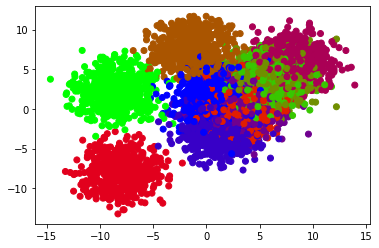

In [ ]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='brg')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

In [ ]:
kmeans.fit(data[0])

KMeans(n_clusters=10)

In [ ]:
kmeans.cluster_centers_

array([[ 8.23896609e+00,  5.99396364e+00, -1.81024004e+00,
        -2.83973112e+00,  8.93642746e+00, -3.14561266e+00,
         7.22929581e+00,  6.52953145e+00,  7.08517380e-01,
         8.44330903e+00],
       [ 3.60634202e+00,  3.12084553e-01, -9.05765493e+00,
        -7.21014274e+00, -6.29047083e+00,  9.87644585e+00,
         4.20317945e-01,  1.47796897e+00,  4.66580177e+00,
         8.19858024e-01],
       [-1.14793842e+00,  7.58429924e+00,  8.99956073e+00,
        -5.98620240e-01, -6.69574239e-01,  2.65463542e+00,
        -3.49381884e+00, -7.60210709e+00, -8.99790870e+00,
         2.66065396e+00],
       [ 3.60310872e+00,  4.97864487e-01, -9.04413868e+00,
        -5.45477140e+00,  1.42275376e+00, -7.43796829e+00,
        -1.98338673e-02, -7.18254060e+00, -8.99053871e+00,
        -6.36617778e+00],
       [-8.07783471e+00, -7.90328366e+00,  4.02727665e+00,
         7.96510374e+00, -6.78304687e+00, -4.46046521e+00,
         3.41112432e+00, -6.82102669e+00,  3.95829979e+00,
        -2.

In [ ]:
# kmeans.labels_
import pandas as pd

df = pd.DataFrame(data)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,0
0,"[[5.229153629534324, 1.4907274156668648, -13.3..."
1,"[5, 8, 2, 4, 9, 4, 3, 7, 3, 4, 8, 1, 3, 8, 8, ..."


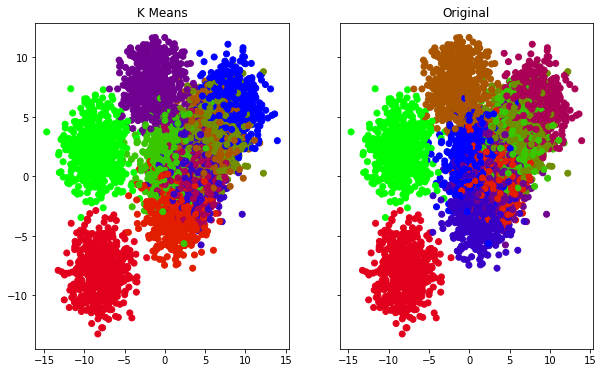

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='brg')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='brg')

In [ ]:
blob_centers = np.array(
    [[ 0.2, 2.3,3,4,5,7,1.5,2,8,0.9],
     [-1.5 ,  2.3,-0.2, 2.3,-3,-4,5,-7,-1.5,2,8,-0.9]])
blob_std = np.array([0.4, 0.3,0.5,0.6,0.7,0.8,0.9,0.2, 0.1, 0.35])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X, y = make_blobs(n_samples=6000, centers=kmeans.cluster_centers_,
                  cluster_std=blob_std, random_state=7)

In [ ]:
from math import sqrt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


def plot_membership(centroids, x):
  cluster_i = np.empty((0,9))
  for x in X:
    dist_c = [sqrt( (x[0] - centroids[0][0])**2 + (x[1] - centroids[0][1])**2 ),  sqrt( (x[0] - centroids[1][0])**2 + (x[1] - centroids[1][1])**2 )]  
    #print(dist_c)
    cluster_i = np.vstack((cluster_i, np.argmin(dist_c)))
  plt.figure(figsize=(8, 4))
  plot_clusters(X,cluster_i)
  plt.scatter(centroids[:,0], centroids[:,9],s = 100, c='r')
  plt.show()
  print(cluster_i)
  return cluster_i

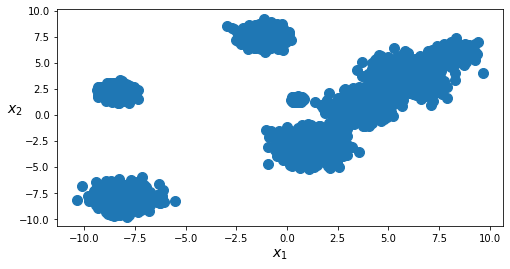

(6000, 10)


In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()
print(X.shape)

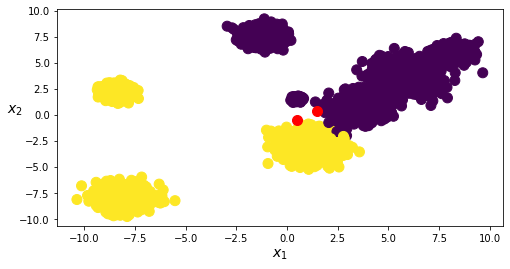

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
[[ 4.07079222  0.77112022 -9.35042866 ... -7.65089211 -8.22136883
  -5.55646728]
 [ 3.85005071  0.82554344 -9.19156926 ... -7.75126682 -9.3567132
  -6.10648113]
 [ 8.32546947  6.56946341 -2.19394203 ...  7.72601042  0.90047534
   8.3598371 ]
 ...
 [-8.82575353  2.1077339   2.09007593 ...  0.70245925  4.04326136
   3.64205434]
 [-0.51089074  7.51998008  9.17399903 ... -7.1789411  -8.63144423
   3.03067176]
 [ 6.3353529   4.55447694  3.67044572 ... -6.31478326 -9.74116828
   7.57146278]]


In [ ]:
centroids = np.array(
    [[1.5, 0.4,1.75,2.5,3.5,0.25,1.25,3.75,4.5,6.5],
     [0.5, -0.5,-0.25,-1.5,-3.2,-2.5,3.5,2.5,-4.25,2.5]]
     )
cluster_i = plot_membership(centroids, X)
print(X)

[-8.2724409  -2.84637131  3.27972888  2.77070893 -8.22599676  1.21985217
  0.48532973 -2.90912438  4.08449455  1.64704339]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


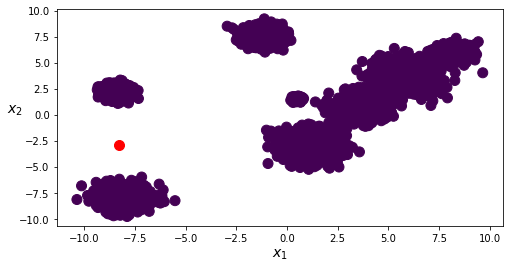

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==2)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==3)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==4)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==5)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==6)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==7)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==8)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==9)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==10)[0]], axis = 0))
# print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))

centroids = np.array(
    [np.mean(X[np.where(cluster_i==1)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==2)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==3)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==4)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==5)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==6)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==7)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==8)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==9)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==10)[0]], axis = 0)]
)

cluster_i = plot_membership(centroids, X)

[ 3.73951666  3.00843013 -2.10344213 -3.02281312  3.13023644 -0.68717508
 -0.44040043 -0.42429287 -1.41203372 -0.29110426]
[-6.07748182 -2.9277906   1.00359192  3.50260751 -3.9886296  -0.34542633
 -1.67300913 -1.74190615  4.23738424  0.15522969]


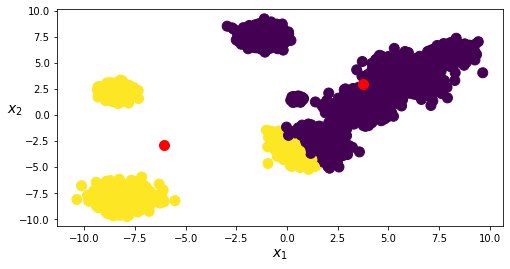

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [ ]:
print(np.mean(X[np.where(cluster_i==0)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))

centroids = np.array(
    [np.mean(X[np.where(cluster_i==0)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==1)[0]], axis = 0)]
)

cluster_i = plot_membership(centroids, X)

[ 3.61831519  2.72906067 -2.28745775 -2.6144688   3.40531405 -0.89475499
 -0.8047437  -0.31675417 -1.12850302 -0.4847981 ]
[-7.19914129 -2.91155516  2.10799509  3.14356224 -6.02520749  0.40738247
 -0.63729313 -2.30967805  4.1624235   0.8775435 ]


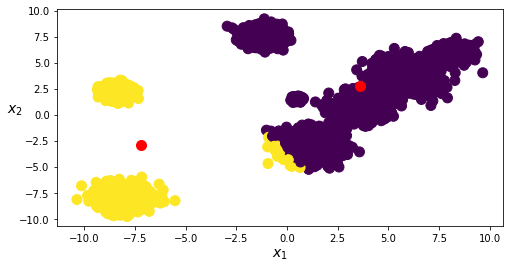

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [ ]:
print(np.mean(X[np.where(cluster_i==0)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))

centroids = np.array(
    [np.mean(X[np.where(cluster_i==0)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==1)[0]], axis = 0)]
)

cluster_i = plot_membership(centroids, X)

[ 3.52680739  2.55764317 -2.39699245 -2.37251351  3.57436595 -1.01920532
 -1.02448983 -0.25546795 -0.96254534 -0.59984914]
[-8.03610365 -2.8716701   3.01300345  2.84498438 -7.71295618  1.029733
  0.22723726 -2.76476611  4.10511515  1.47032164]


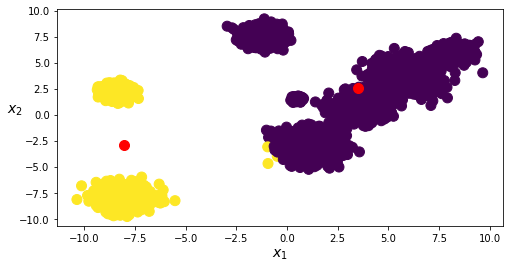

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [ ]:
print(np.mean(X[np.where(cluster_i==0)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))

centroids = np.array(
    [np.mean(X[np.where(cluster_i==0)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==1)[0]], axis = 0)]
)

cluster_i = plot_membership(centroids, X)

[ 3.5009685   2.51309831 -2.42164142 -2.31813611  3.61578125 -1.04987736
 -1.07654516 -0.23897772 -0.92220718 -0.62686808]
[-8.25986908 -2.84749304  3.26419296  2.77561327 -8.19711095  1.20994719
  0.47018664 -2.90144087  4.08749114  1.63656906]


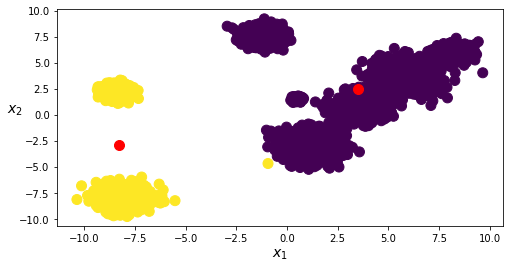

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [ ]:
print(np.mean(X[np.where(cluster_i==0)[0]], axis = 0))
print(np.mean(X[np.where(cluster_i==1)[0]], axis = 0))

centroids = np.array(
    [np.mean(X[np.where(cluster_i==0)[0]], axis = 0),
     np.mean(X[np.where(cluster_i==1)[0]], axis = 0)]
)

cluster_i = plot_membership(centroids, X)